In [46]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram
from pathlib import Path
import os
%matplotlib inline
plt.rcParams.update({'font.size': 15})

## 1. Load Data

In [47]:
#wd = Path(os.getcwd()).parent
wd = Path(os.getcwd())
data_fname = Path(os.path.join(wd, 'Datasets', 'DataExamples.npy'))
time_fname = Path(os.path.join(wd, 'Datasets', 'TimeExamples.npy'))
label_fname = Path(os.path.join(wd, 'Datasets', 'LabelExamples.npy'))
events = np.load(data_fname) # features, # samples
labels = np.load(label_fname) # samples, 1
times = np.load(time_fname) # features, # samples
times = (times - times[0,:]) * 3600 * 24 # set time to 0 and in seconds
fs = (times[:,0] < 60).nonzero()[0].shape[0] / 60 # sampling frequency
print('sampling frequency', fs)


sampling frequency 40.016666666666666


## 2. Make Figure

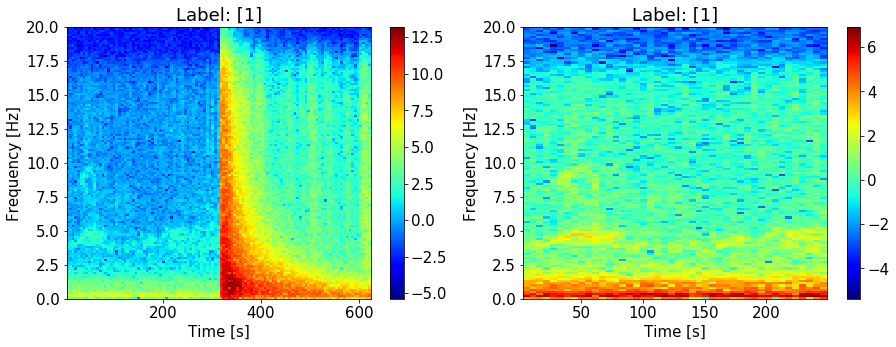

In [50]:
precursor = int(256 * times.shape[0] / (2 * (256 + 60)))
sample = 2
fig = plt.figure(figsize=(15, 5))
fig.add_subplot(1, 2, 1)
x = events[:,sample]
f, t, Sxx = spectrogram(x, fs)
plt.pcolormesh(t, f, np.log10(Sxx), cmap='jet')
plt.xlabel('Time [s]')
plt.ylabel('Frequency [Hz]')
plt.colorbar()
plt.title('Label: ' + str(labels[sample]))

fig.add_subplot(1, 2, 2)
x = events[:precursor,sample]
f, t, Sxx = spectrogram(x, fs)
plt.pcolormesh(t, f, np.log10(Sxx), cmap='jet')
plt.xlabel('Time [s]')
plt.ylabel('Frequency [Hz]')
plt.colorbar()
plt.title('Label: ' + str(labels[sample]))
plt.savefig('Images\spectrogram.png', bbox_inches='tight', dpi=400)